Import library

In [108]:
import pandas as pd
import numpy as np

In [109]:
!python --version


Python 3.11.13


Load data & EDA

In [110]:
df = pd.read_csv('/content/drive/MyDrive/credit_scoring.csv')

In [111]:
df.head()

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
0,501000,41,13995609,5982664,0,624,0,0,-0.040
1,501001,58,13683833,3711198,0,809,0,0,0.001
2,501002,33,9417391,7172332,0,647,0,0,0.077
3,501003,45,6861811,8661056,0,450,0,0,0.038
4,501004,22,5640742,4520669,1,816,0,0,0.020


In [112]:
df.tail()

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
5995,506995,26,18253018,3690565,2,729,0,0,0.008
5996,506996,40,9944385,4082038,1,477,0,0,0.017
5997,506997,28,9048532,14760384,0,450,0,0,-0.054
5998,506998,51,6843160,11774594,0,561,0,0,0.026
5999,506999,35,12715733,8006387,0,774,0,0,0.008


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_id     6000 non-null   int64  
 1   age                6000 non-null   int64  
 2   monthly_income     6000 non-null   int64  
 3   loan_amount        6000 non-null   int64  
 4   previous_defaults  6000 non-null   int64  
 5   credit_score       6000 non-null   int64  
 6   default            6000 non-null   int64  
 7   leak_col_good      6000 non-null   int64  
 8   leak_col_subtle    6000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 422.0 KB


In [114]:
df.describe()

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
count,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,503999.500000,40.321500,1.140386e+07,8.001122e+06,0.243667,575.979833,0.012167,0.012167,0.011945
std,1732.195139,11.300697,4.912598e+06,4.071786e+06,0.484767,158.328931,0.109639,0.109639,0.113947
min,501000.000000,21.000000,3.000310e+06,1.000794e+06,0.000000,300.000000,0.000000,0.000000,-0.119000
25%,502499.750000,31.000000,7.163379e+06,4.440939e+06,0.000000,438.750000,0.000000,0.000000,-0.020000
50%,503999.500000,41.000000,1.129945e+07,7.982304e+06,0.000000,577.500000,0.000000,0.000000,0.000000
75%,505499.250000,50.000000,1.573705e+07,1.153144e+07,0.000000,713.000000,0.000000,0.000000,0.021000
max,506999.000000,59.000000,1.998622e+07,1.499858e+07,3.000000,849.000000,1.000000,1.000000,1.092000


In [115]:
df.nunique()

,0
application_id,6000
age,39
monthly_income,6000
loan_amount,6000
previous_defaults,4
credit_score,550
default,2
leak_col_good,2
leak_col_subtle,239


In [116]:
df[df.duplicated()]


,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle


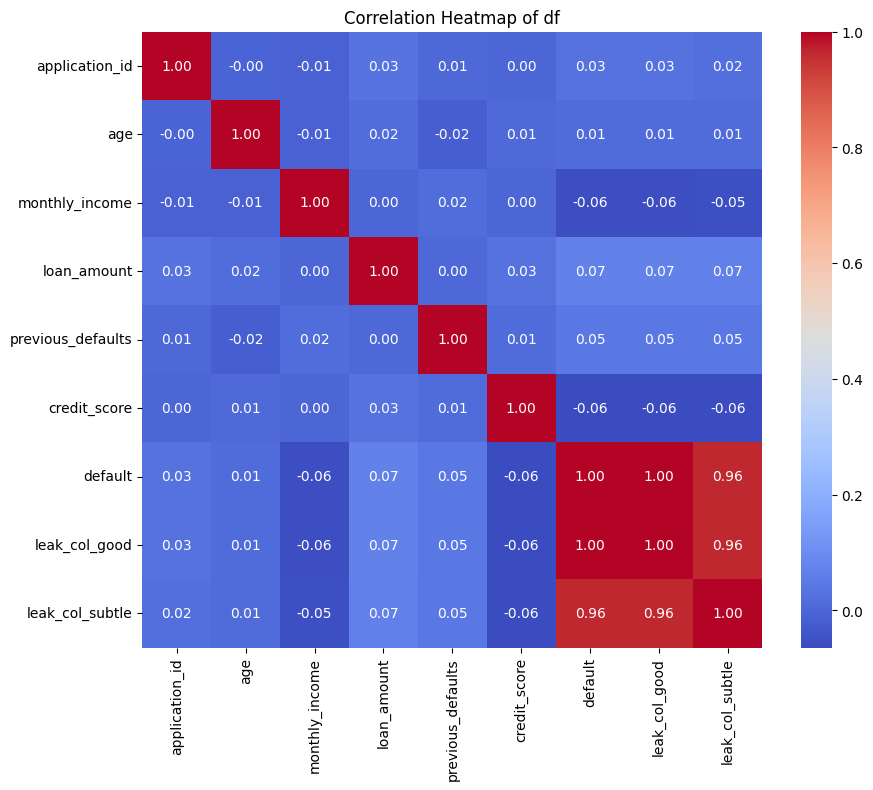

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of df')
plt.show()

"Kolom leak_col_good dan leak_col_subtle akan didrop karena berisi informasi yang tidak akan tersedia pada saat prediksi sebenarnya dilakukan, sehingga akan membuat performa model terlihat terlalu bagus secara tidak realistis"

In [118]:
df.drop(['leak_col_good', 'leak_col_subtle'], axis=1, inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   application_id     6000 non-null   int64
 1   age                6000 non-null   int64
 2   monthly_income     6000 non-null   int64
 3   loan_amount        6000 non-null   int64
 4   previous_defaults  6000 non-null   int64
 5   credit_score       6000 non-null   int64
 6   default            6000 non-null   int64
dtypes: int64(7)
memory usage: 328.3 KB


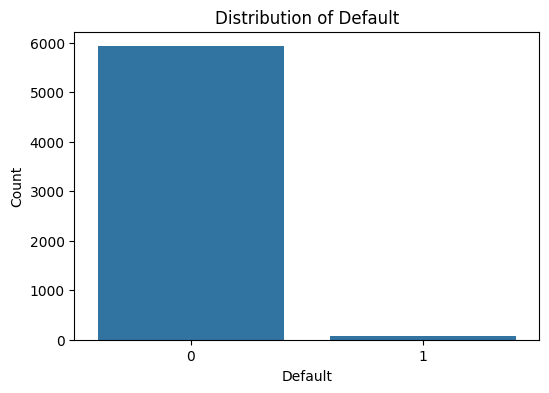

In [120]:
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df)
plt.title('Distribution of Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

Terdapat class imbalance pada kolom target yang sangat signifikan.



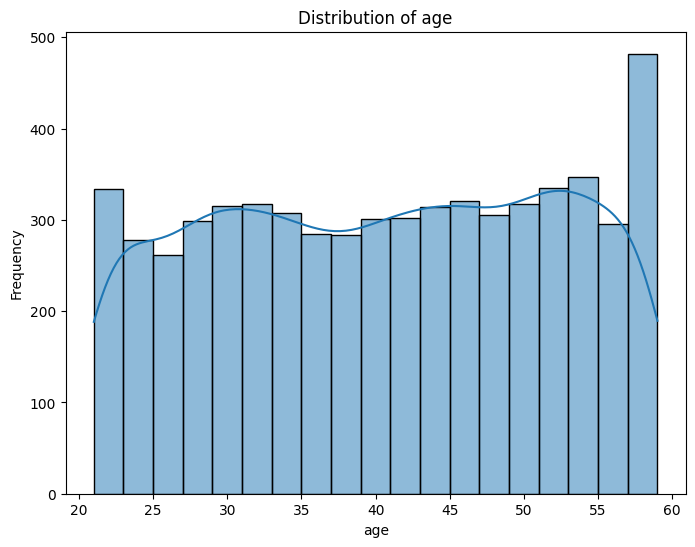

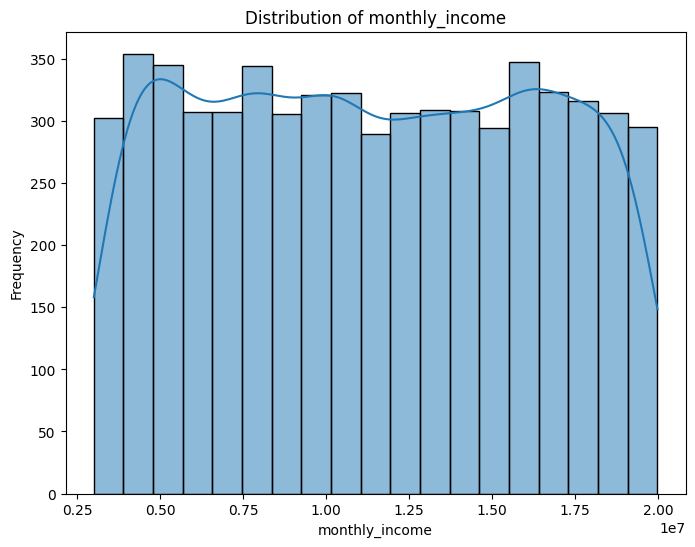

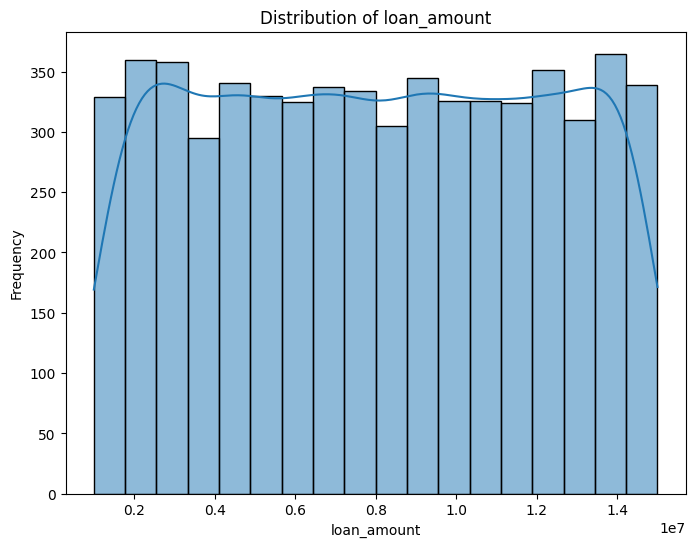

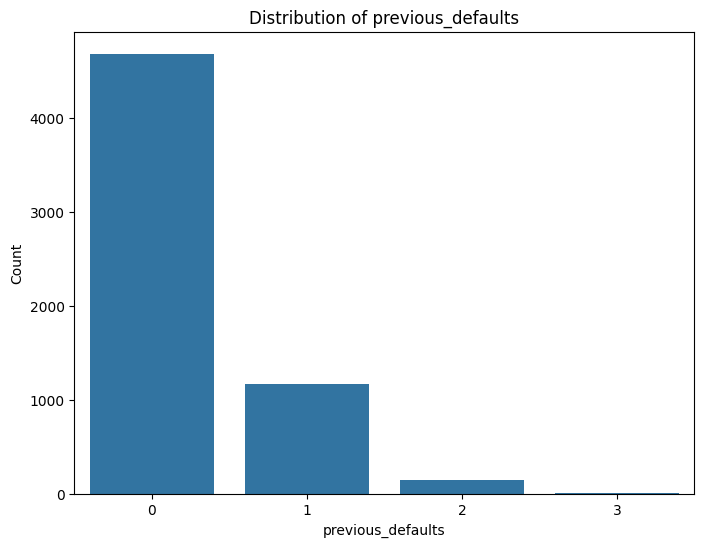

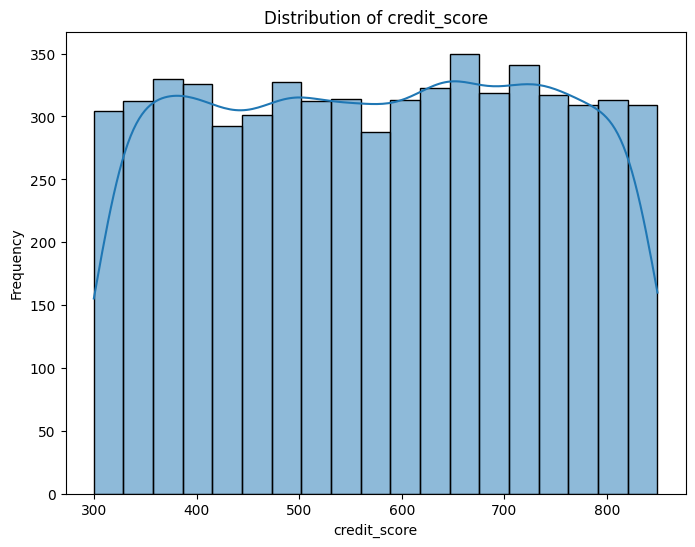

In [121]:
features_to_plot = df.drop(['application_id', 'default'], axis=1).columns

for col in features_to_plot:
    plt.figure(figsize=(8, 6))
    if df[col].dtype == 'object' or df[col].nunique() < 20:
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    else:
        sns.histplot(x=col, data=df, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.show()

Preprocessing

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import roc_auc_score, classification_report

In [123]:
x = df.drop(['application_id', 'default'], axis=1)
y = df['default']

In [124]:
x

,age,monthly_income,loan_amount,previous_defaults,credit_score
0,41,13995609,5982664,0,624
1,58,13683833,3711198,0,809
2,33,9417391,7172332,0,647
3,45,6861811,8661056,0,450
4,22,5640742,4520669,1,816
...,...,...,...,...,...
5995,26,18253018,3690565,2,729
5996,40,9944385,4082038,1,477
5997,28,9048532,14760384,0,450
5998,51,6843160,11774594,0,561


In [125]:
y

,default
0,0
1,0
2,0
3,0
4,0
...,...
5995,0
5996,0
5997,0
5998,0


In [126]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print("\nProporsi target di y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporsi target di y_test:")
print(y_test.value_counts(normalize=True))

(4800, 5)
(1200, 5)
(4800,)
(1200,)

Proporsi target di y_train:
default
0    0.987917
1    0.012083
Name: proportion, dtype: float64

Proporsi target di y_test:
default
0    0.9875
1    0.0125
Name: proportion, dtype: float64


Gunakan stratify untuk memastikan bahwa proporsi target yang imbalance itu sama di y_train dan y_test, ini menghindari split yang tidak representatif

In [127]:
features = ['age', 'monthly_income', 'loan_amount', 'previous_defaults', 'credit_score']

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), features)])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(class_weight='balanced'))])

In [128]:
model_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'monthly_income',
                                                   'loan_amount',
                                                   'previous_defaults',
                                                   'credit_score'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [153]:
y_pred_proba = model_pipeline.predict_proba(x_test)[:, 1]
y_pred = model_pipeline.predict(x_test)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Skor AUC data test: {auc_score:.4f}")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Skor AUC data test: 0.7574
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1185
           1       0.03      0.60      0.05        15

    accuracy                           0.73      1200
   macro avg       0.51      0.67      0.45      1200
weighted avg       0.98      0.73      0.84      1200


Confusion Matrix:
[[873 312]
 [  6   9]]


In [149]:
gb_smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.1, 0.05, 0.01]
}

grid_search = GridSearchCV(
    estimator=gb_smote_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2
)

In [150]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100; total time=   1.5s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100; total time=   1.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100; total time=   1.4s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=150; total time=   2.6s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=150; total time=   2.8s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=150; total time=   2.1s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100; total time=   2.3s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100; total time=   2.2s
[CV] END classifier__learni

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'monthly_income',
                                                                          'loan_amount',
                                                                          'previous_defaults',
                                                                          'credit_score'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.1, 0.05, 0.01],
                         'classifier__max_depth': [3, 5],
                         'classifier__n_estimators': [100, 150]},
             scoring='roc_auc', verbose=2)

In [154]:
print("Parameter terbaik:")
print(grid_search.best_params_)
print(f"Skor AUC terbaik: {grid_search.best_score_:.4f}")

best_gb_model = grid_search.best_estimator_
y_pred_proba_best_gb = best_gb_model.predict_proba(x_test)[:, 1]
final_auc_gb = roc_auc_score(y_test, y_pred_proba_best_gb)

print(f"Skor AUC pada Data Test: {final_auc_gb:.4f}")
print(classification_report(y_test, best_gb_model.predict(x_test)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_gb_model.predict(x_test)))

Parameter terbaik:
{'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 150}
Skor AUC terbaik: 0.7818
Skor AUC pada Data Test: 0.6890
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      1185
           1       0.02      0.33      0.04        15

    accuracy                           0.77      1200
   macro avg       0.50      0.56      0.45      1200
weighted avg       0.98      0.77      0.86      1200


Confusion Matrix:
[[923 262]
 [ 10   5]]


"Model Logistic Regression (AUC ≈ 0.7574) dipilih sebagai model final. Upaya untuk meningkatkan performa dengan model Gradient Boosting yang lebih kompleks, bahkan setelah SMOTE untuk data imbalance dan hyperparameter tuning, tidak berhasil mengungguli performa baseline. Kesimpulannya, model yang lebih sederhana dapat mengungguli model kompleks yang sudah dioptimisasi.